In [2]:
from IPython.display import Image

A herd of cows have the individual attributes summarised in the table below.

| name      | breed      | age | milk production | character | music taste |
|-----------|------------|-----|-----------------|-----------|-------------|
| Clover    | Holstein   | 2   | 20              | lively    | rock        |
| Sunny     | Ayrshire   | 2   | 10              | kind      | rock        |
| Rose      | Holstein   | 5   | 15              | calm      | country     |
| Daisy     | Ayrshire   | 4   | 25              | calm      | classical   |
| Strawberry| Finncattle | 7   | 35              | calm      | classical   |
| Molly     | Ayrshire   | 8   | 45              | kind      | country     |

a) Which ones of the attributes are numerical and which are categorical? Further, which ones are nominal and which are ordinal?

b) Explain K-means clustering and why it cannot be directly applied to data with non-numerical attributes.

c) Explain K-modes clustering and how it can be applied to data with categorical attributes.

d) Apply K-modes clustering to the above herd of cows by using only their categorical attributes and the value K = 2.

e) Identify the stages of the K-modes algorithm that were dependent on the ordering of the data. What kinds of problems may follow from the dependency on data ordering?

a) Which ones of the attributes are numerical and which are categorical? Further, which ones are nominal and which are ordinal?

Numerical Attributes: These are attributes that are measurable and can be quantified.

"age": A quantifiable attribute that can take on any numerical value within a range. It is a ratio-type attribute because it has a true zero point and the distances between different ages are meaningful.

"milk production": Also a quantifiable attribute measured in some unit (e.g., liters or gallons), making it a numerical attribute.

Categorical Attributes: These include attributes that are qualitative and typically describe a quality or characteristic of a data unit.

"breed": This is a categorical attribute since it denotes a category to which each cow belongs. This is also a nominal attribute, as there is no inherent order among the different breeds.

"character": Another categorical attribute describing the temperament of the cow. It is nominal because there is no order; 

"music taste": Categorical and nominal, as preferences for music genres do not have an intrinsic order.

Nominal Attributes: Nominal variables are categories without any numerical ranking.

"breed", "character", and "music taste" are nominal.

Ordinal Attributes: Ordinal variables are categorical variables that have a clear ordering.

The given table does not explicitly list any ordinal attributes.

b) K-means Clustering:
K-means clustering is a method of vector quantization that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. It is best suited for numerical data because it minimizes variance (Euclidean distances) within each cluster.

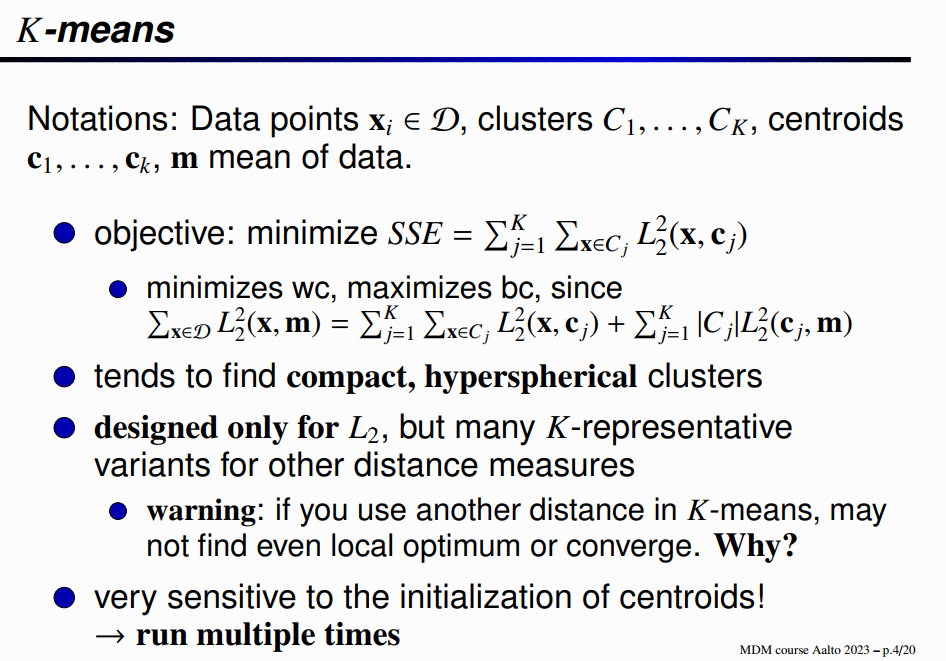

In [ ]:
Image(filename='Kmeans.png', width=800, height=500)

Why K-means cannot be directly applied to non-numerical attributes:
K-means relies on calculating the mean value of the observations in the Euclidean space to form clusters. With categorical data, the mean does not have a meaningful definition, and thus, the concept of a 'centroid' is not valid.
Additionally, calculating distances between categorical attributes is not straightforward as it is with numerical attributes. There is no inherent way to measure the "distance" between categories like "Holstein" and "Ayrshire" or between "rock" and "classical".

c) K-modes Clustering:
K-modes clustering is an extension of K-means which instead of means uses modes. This algorithm is suitable for categorical data.

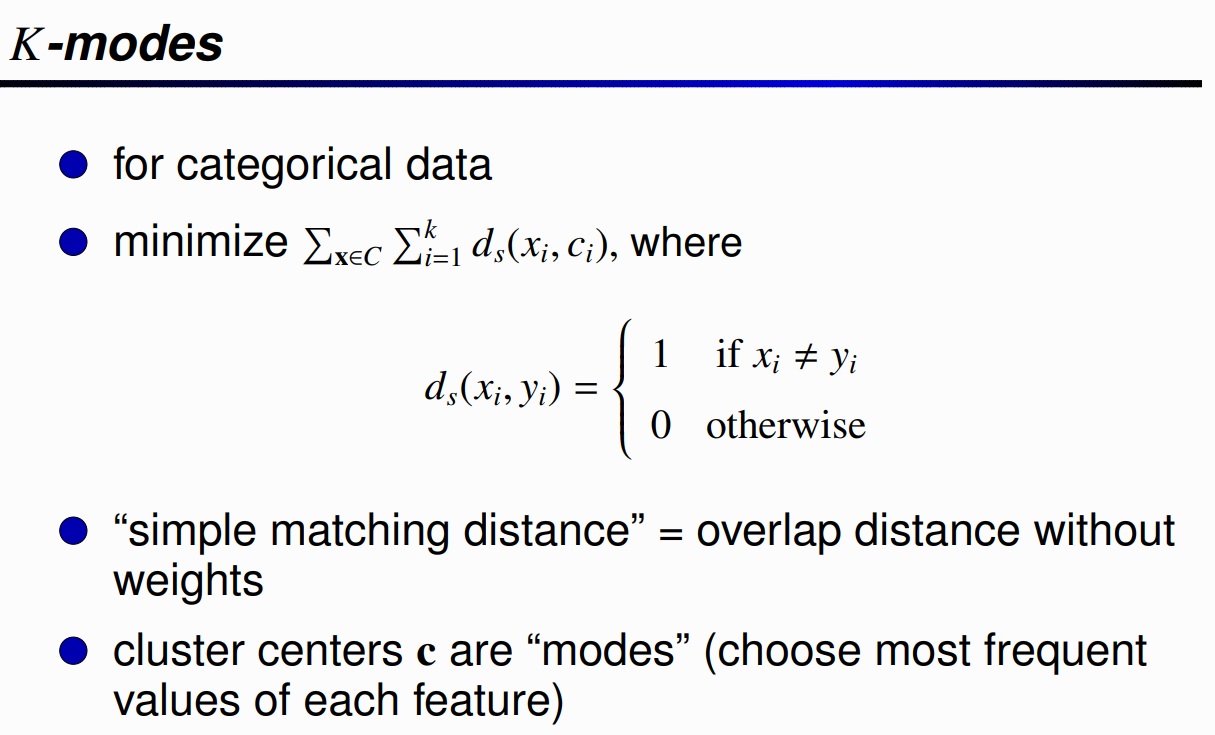

In [ ]:
Image(filename='Kmodes.png', width=800, height=500)

How K-modes can be applied to data with categorical attributes:
K-modes uses modes, the most frequent values in a cluster, instead of means. It measures the dissimilarity between objects by counting mismatches in the categories and minimizes the dissimilarity to form clusters.
The algorithm replaces the mean of a cluster with a mode which is a vector of the most frequent categories in the cluster.
For categorical data, the update of centroids in K-modes is based on the mode, and the cost function it minimizes is based on the simple matching dissimilarity measure (the number of category mismatches).
By using the mode and a matching dissimilarity measure, K-modes clustering is able to directly handle categorical data, forming clusters where within-cluster similarity is maximized based on the frequency of categorical attributes.

d) Apply K-modes clustering to the above herd of cows by using only their categorical attributes and the value K = 2.



Step 1: Pick an observation (instance) at random and use that as a cluster

Step 2: Compare each datapoint in the cluster to each observation data points, any elements tat are not equal we +1 if they are equal we +0

Step 3: Assign each individual to the closest centroid

Step 4: Each feature should have the mode (most common response) for each centroid

step 4: Repeat step 2-4 until no changes are made in the assignment of individuals to the closest centroid

https://www.youtube.com/watch?v=b39_vipRkUo

Step 1: Pick an observation (instance) at random and use that as a cluster, where K = 2

First let's choose Clover (C1) and Daisy (C2) as our initial centroids.

Step 2 and 3

Now we use the dissimilarity measure to assign each cow to the closest centroid.
Random means that if there is a tie, we choose one of the centroids at random.

| name       | breed      | character | music taste | dissimilarity to C1 | dissimilarity to C2 | closest centroid |
|------------|------------|-----------|-------------|---------------------|---------------------|------------------|
| Clover     | Holstein   | lively    | rock        | 0                   | 3                   | C1               |
| Sunny      | Ayrshire   | kind      | rock        | 2                   | 2                   | C1 (random)      |
| Rose       | Holstein   | calm      | country     | 2                   | 2                   | C1 (random)      |
| Daisy      | Ayrshire   | calm      | classical   | 3                   | 0                   | C2               |
| Strawberry | Finncattle | calm      | classical   | 3                   | 1                   | C2               |
| Molly      | Ayrshire   | kind      | country     | 3                   | 2                   | C2               |

Step 4: The new clusters are the combination of the modes of the individual features in each cluster.
If there are mulitple modes for a feature, we choose one at random.

| breed      | character     | music taste |
|------------|---------------|-------------|
| Holstein   | kind (random) | rock        |
| Ayrshire   | calm          | classical   |

Step 5: Repeat steps 2-4 

| name       | breed      | character | music taste | dissimilarity to C1 | dissimilarity to C2 | closest centroid |
|------------|------------|-----------|-------------|---------------------|---------------------|------------------|
| Clover     | Holstein   | lively    | rock        | 1                   | 3                   | C1               |
| Sunny      | Ayrshire   | kind      | rock        | 1                   | 2                   | C1               |
| Rose       | Holstein   | calm      | country     | 2                   | 2                   | C1 (random)      |
| Daisy      | Ayrshire   | calm      | classical   | 3                   | 0                   | C2               |
| Strawberry | Finncattle | calm      | classical   | 3                   | 1                   | C2               |
| Molly      | Ayrshire   | kind      | country     | 2                   | 2                   | C2 (random)      |

New modes
| breed      | character     | music taste |
|------------|---------------|-------------|
| Holstein   | kind (random) | rock        |
| Ayrshire   | calm          | classical   |

Mode has not changed nor there are no changes in the assignment of individuals to the closest centroid, so we stop.

e) Identify the stages of the K-modes algorithm that were dependent on the ordering of the data. What kinds of problems may follow from the dependency on data ordering?



In the K-modes algorithm, certain stages can be influenced by the ordering of the data, particularly when dealing with categorical data where ties must be broken when choosing the mode or initial centroids. Here are the stages that might be affected:

Initial Mode Selection (Step 1): If you pick the initial mode (centroid) randomly from the data points, the choice of the starting point can influence the final clusters because different initial modes may lead to different local optima. The order in which data points are processed when selecting initial modes can affect the outcome if ties need to be broken or if a heuristic is used.

Assignment to Centroids (Step 3): If there is a tie in the distances when assigning data points to the closest centroid, the order in which points are considered can influence which centroid a point is assigned to, potentially leading to different clustering results.

Mode Calculation (Step 4): When updating the mode of each cluster, if there is a tie for the most common category of a feature within a cluster, the order in which the data points are processed could determine which category is chosen as the mode.